# 24.08.12 통계 학습 4회차: 가설 검정(Hypothesis Testing)

### 🔎목차

1. `가설 검정의 개요`

    - 가설 검정의 목적과 필요성

    - 귀무가설과 대립가설

2. `유형1 및 유형2 오류`

    - 오류의 정의와 예시

    - 유의 수준(α)과 검정력(1-β)

3. `p-value의 개념`

    - p-value의 의미와 해석
    
    - 유의 수준과 p-value 비교

4. `단측 검정과 양측 검정`

    - 차이점과 사용 사례

5. `대표적인 가설 검정 방법`

    - t-검정, z-검정, 카이제곱 검정 등

6. `가설 검정의 실제 적용`

    - 데이터 분석에서의 가설 검정 적용 예제
    
    - Python을 이용한 가설 검정 실습

7. `가설 검정의 한계와 주의사항`

    - 오해와 잘못된 해석 방지

### 1. 가설 검정의 개요

#### 이론

- 가설 검정은 데이터에서 얻은 `샘플` 정보를 바탕으로, `전체 모집단`에 대한 가설을 검증하는 통계적 방법이다.

- 귀무가설(H₀)은 우리가 참이라고 가정하는 가설이며, 대립가설(H₁)은 이를 반박하는 가설이다.

- 예를 들어, 평균이 0이라는 귀무가설에 대해 평균이 0이 아니라는 대립가설을 설정할 수 있다.

#### 수식

- 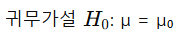

- 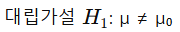

### 2. 유형1 및 유형2 오류

- 유형1 오류(α)는 귀무가설이 참일 때, 이를 기각하는 오류를 의미한다.

- 유형2 오류(β)는 귀무가설이 거짓일 때, 이를 기각하지 않는 오류를 뜻한다.

- 유의 수준(α)은 유형1 오류를 저지를 확률이고, 검정력(1-β)은 대립가설을 참으로 올바르게 판단할 확률이다.

### 3. p-value의 개념

- p-value는 귀무가설이 참이라는 가정 하에, `관측된 데이터` 또는 `더 극단적인 결과`가 나타날 확률이다.

- p-value가 유의 수준 α보다 작으면, 귀무가설을 기각한다.

- `유의 수준이 더 크다`: 현재 실험 결과는 우연이 아니다, 귀무 가설이 틀릴 확률이 더 크다.

- `p-value가 더 크다`: 현재 실험 결과는 우연일 확률이 크다, 대립 가설이 틀릴 확률이 더 크다.

#### 🔎np.random.seed(0)

- 난수 생성기의 초기값을 설정하여 동일한 결과를 얻도록 설정한다.

#### 🔎np.random.normal(0, 1, 100)

- 평균이 0이고 표준편차가 1인 정규분포에서 100개의 가상 데이터를 생성한다.

#### 🔎stats.ttest_1samp(data, 0)

- 데이터 data의 평균이 0과 통계적으로 유의미하게 다른지를 검정한다.

In [9]:
# 라이브러리 불러오기
import numpy as np
from scipy import stats

# 넘파이로 예제 데이터 생성
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # 평균 0, 표준편차 1의 정규분포 데이터

# 단일 표본 t-검정 수행
t_stat, p_val = stats.ttest_1samp(data, 0)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 0.5904283402851698, P-Value: 0.5562489158694675


#### 💡왜 0과 평균을 비교하는 건가?

1. 일반적으로 단일 표본 t-검정에서는 데이터의 평균이 특정 값과 통계적으로 유의미하게 다른지 확인할 때 사용한다.

2. 여기서 0은 비교 기준으로 선택된 것이며, 데이터가 평균 0인 분포에서 생성되었는지 확인하기 위해 사용되었다.

3. 만약 데이터의 평균이 0과 다르다면, p-값을 통해 귀무가설을 기각할 수 있다.

4. 우린 평균이 0, 표준편차가 1인 가상의 데이터를 생성했으니 결과를 해석해보자.

#### 💡결과 해석

1. P-Value가 0.5562로, 일반적인 유의 수준(예: 0.05)보다 훨씬 크기 때문에 귀무가설을 기각할 수 없다.

2. 즉, 이 데이터의 평균이 0과 유의미하게 다르지 않다고 결론을 내릴 수 있다.

3. 다시 말해, 데이터의 평균이 0일 가능성을 통계적으로 충분히 배제할 수 없다.

### 4. 단측 검정과 양측 검정

#### 이론

- 단측 검정은 한 방향으로의 효과만을 검증하며, 양측 검정은 양방향의 효과를 검증한다.

- 예를 들어, 단측 검정은 "평균이 μ₀보다 크다" 또는 "작다"를 검정하고, 양측 검정은 "μ₀와 다르다"를 검정한다.

#### 수식

- 단측 검정: 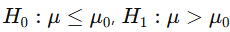

- 양측 검정: 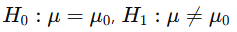

In [3]:
# 양측 검정과 단측 검정 비교
t_stat, p_val_two_tailed = stats.ttest_1samp(data, 0)  # 양측 검정
p_val_one_tailed = p_val_two_tailed / 2  # 단측 검정

print(f"P-Value (Two-Tailed): {p_val_two_tailed}")
print(f"P-Value (One-Tailed): {p_val_one_tailed}")

P-Value (Two-Tailed): 0.5562489158694675
P-Value (One-Tailed): 0.2781244579347337


#### 🔎t_stat, p_val_two_tailed = stats.ttest_1samp(data, 0)

- ttest_1samp 함수로 양측 검정을 수행한다.

- 해당 코드는 데이터의 평균이 0인지 검정하며, 그 결과로 t-통계량(t_stat)과 p-value(p_val_two_tailed)를 반환한다.

#### 🔎p_val_one_tailed = p_val_two_tailed / 2

- 단측 검정의 p-value는 양측 검정의 p-value를 반으로 나눈 값이다.

### 5. 대표적인 가설 검정 방법

#### 이론: 대표적인 가설 검정 방법에는 t-검정, z-검정, 카이제곱 검정 등이 있다.

1. t-검정은 샘플의 평균을 이용해 가설을 검증한다.

2. z-검정은 모집단의 표준편차를 알고 있을 때 사용한다.

3. 카이제곱 검정은 두 범주형 변수 간의 독립성을 검정한다.

In [7]:
# t-검정 예제 코드
group1 = np.random.normal(5, 1, 50)  # 평균이 5와 6, 표준편차가 1인 정규분포에서 50개의 샘플을 생성한 데이터다.
group2 = np.random.normal(6, 1, 50)  # 평균이 5와 6, 표준편차가 1인 정규분포에서 50개의 샘플을 생성한 데이터다.
t_stat, p_val = stats.ttest_ind(group1, group2)  # 독립 표본 t-검정을 수행하여 두 그룹의 평균이 통계적으로 유의미하게 다른지를 평가한다.
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -4.941127419637071, P-Value: 3.202973777195912e-06


#### 💡독립 표본 t-검정(Independent t-test)

1. 두 개의 독립된 그룹의 평균을 비교하여, 이 두 그룹이 통계적으로 유의미한 차이가 있는지 확인하는 방법.

2. 즉, 두 그룹의 데이터가 같은 모집단에서 나왔는지, 아니면 서로 다른 모집단에서 나왔는지를 평가하는 데 사용된다.

3. 예를 들어, 두 그룹의 평균이 동일한지 여부를 검증할 때 독립 표본 t-검정을 수행하여 그 차이가 우연에 의한 것인지, 아니면 실제로 유의미한 차이가 있는지를 판단한다.

4. 비교 요약

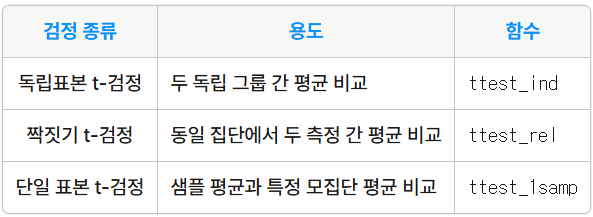

### 6. 가설 검정의 실제 적용

- 데이터 분석에서 가설 검정은 다양한 분야에 적용된다.

- 예를 들어, A/B 테스트에서 두 버전 간의 차이를 검증할 때 사용한다.

In [8]:
# 가설 검정을 통한 A/B 테스트
data_A = np.random.normal(0.5, 0.1, 1000)
data_B = np.random.normal(0.52, 0.1, 1000)
t_stat, p_val = stats.ttest_ind(data_A, data_B)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -4.659080940649399, P-Value: 3.3856497120182944e-06


### 7. 가설 검정의 한계와 주의사항

- 가설 검정은 유의 수준에 따라 결론이 달라질 수 있으며, p-value가 작다고 해서 항상 중요한 결과는 아니다.

- 또한, 다중 검정을 수행할 때는 유의 수준의 조정이 필요하다.